In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading & Preprocessing

In [3]:
df_train_v1 = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', header=None)
df_val_v1 = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv', header=None)

In [4]:
df_train_v1.columns = ['id', 'entity', 'sentiment', 'content']
df_val_v1.columns = ['id', 'entity', 'sentiment', 'content']

In [5]:
df_train_v1.head()

,id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df_val_v1.head()

,id,entity,sentiment,content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
print('__________________Information_____________________')
print('')
print('______________________________________')
print('----------------Train-----------------')
print('______________________________________')
print(df_train_v1.info())
print('')
print('______________________________________')
print('-------------Validation-------------')
print('______________________________________')
print( df_val_v1.info())

__________________Information_____________________

______________________________________
----------------Train-----------------
______________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

______________________________________
-------------Validation-------------
______________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   int64 
 1   entity     1000 non-null   object
 2   sentiment  1000 non-null   object
 3   content    10

In [8]:
missing_percent = (df_train_v1.isnull().sum() / len(df_train_v1)) * 100
print(missing_percent)

id           0.000000
entity       0.000000
sentiment    0.000000
content      0.918561
dtype: float64


In [9]:
print("No of missing rows", len(df_train_v1[df_train_v1.content.isnull()]))
print("No of id unique:", df_train_v1[df_train_v1.content.isnull()].id.nunique())
print("No of entity unique:", df_train_v1[df_train_v1.content.isnull()].entity.nunique())

No of missing rows 686
No of id unique: 326
No of entity unique: 32


In [10]:
duplicate_count = df_train_v1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 2700


In [11]:
print("No. of rows:",len(df_train_v1))
print("Unique IDs:", df_train_v1.id.nunique())
unique_combinations = df_train_v1[['id', 'entity']].drop_duplicates().shape[0]
print(f"Number of unique (id & entity) combinations: {unique_combinations}")
unique_combinations2 = df_train_v1[['id', 'entity','content']].drop_duplicates().shape[0]
print(f"Number of unique (id & entity & content) combinations: {unique_combinations2}")


No. of rows: 74682
Unique IDs: 12447
Number of unique (id & entity) combinations: 12447
Number of unique (id & entity & content) combinations: 71982


In [12]:
df_train_v1.describe(include='object')

,entity,sentiment,content
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [13]:
mask = df_train_v1.groupby(['id', 'entity', 'content'])['sentiment'].transform('nunique') > 1
df_conflict = df_train_v1[mask]
print("Conflict rows:" ,len(df_conflict))

Conflict rows: 0


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [14]:
df_train_v1.sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [15]:
df_train_v1.entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

**Initial Data exploration revealed following:**
1. Data contains missing values in content
2. Contains 32 unique entities
3. 2700 Duplicate rows
4. 4 Unique sentiment labels

## Table Preprocessing

In [16]:
df_train_v2 = df_train_v1.copy()

In [17]:
df_train_v2 = df_train_v2[~df_train_v2.content.isnull()]
df_train_v2 = df_train_v2.drop_duplicates()

In [18]:
print("rows dropped:", (len(df_train_v1) - len(df_train_v2))/len(df_train_v1) ,"%")

rows dropped: 0.040518464958088966 %


*Null values in content and duplicates dropped*

# EDA - I

In [19]:
df_train_v2_EDA = df_train_v2.copy()

In [20]:
df_train_v2_EDA.columns

Index(['id', 'entity', 'sentiment', 'content'], dtype='object')

## Univariate

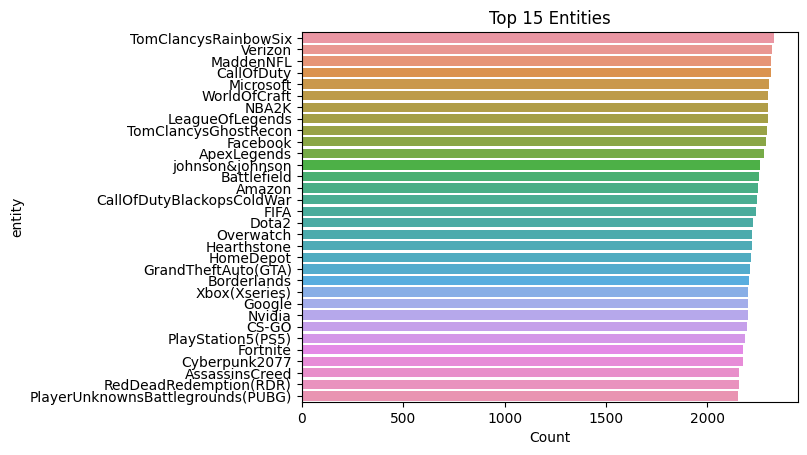

In [21]:
top_entities = df_train_v2_EDA['entity'].value_counts()
sns.barplot(x=top_entities.values, y=top_entities.index)
plt.title('Top 15 Entities')
plt.xlabel('Count')
plt.show()


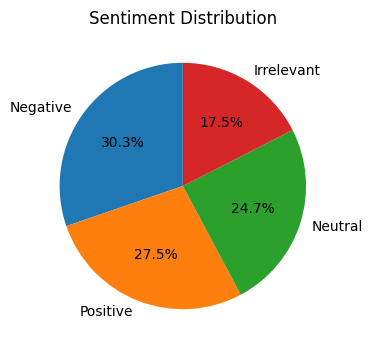

In [22]:
sentiment_counts = df_train_v2_EDA['sentiment'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

## Bivariate

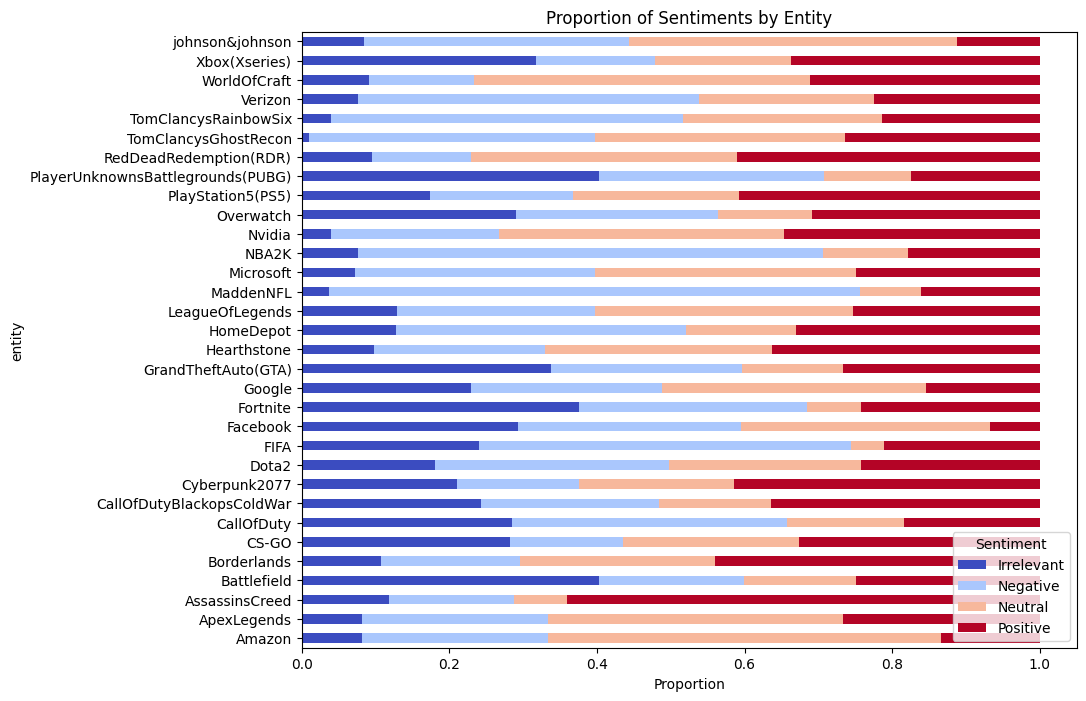

In [23]:
# Create cross-tab of entity vs sentiment
entity_sentiment = pd.crosstab(df_train_v2_EDA['entity'], df_train_v2_EDA['sentiment'])

# Convert to percentage
entity_sentiment = entity_sentiment.div(entity_sentiment.sum(axis=1), axis=0)

# Plot stacked horizontal bar chart
entity_sentiment.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='coolwarm')
plt.title('Proportion of Sentiments by Entity')
plt.xlabel('Proportion')
plt.legend(title='Sentiment')
plt.show()


**Insights**
* Data doesn't show much of a class imabalance (Decent proportion across)
* Proportion of sentiments across entities also looks balanced

# Text Preprocessing

In [24]:
import re
import nltk
from nltk.corpus import stopwords

In [25]:
import nltk
nltk.download('punkt')  # For tokenizing
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # WordNet language support

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [26]:
df_clean = df_train_v2.copy()

In [27]:
df_clean['content'] = df_clean['content'].str.lower()

In [28]:
def basic_cleaning(text):
    text = re.sub(r'http\S+|www\S+', '', text)       # Remove URLs
    text = re.sub(r'@\w+', '', text)                 # Remove @mentions
    text = re.sub(r'#\w+', '', text)                 # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)          # Remove numbers and special chars
    text = re.sub(r'\s+', ' ', text).strip()         # Remove extra spaces
    return text

df_clean['content'] = df_clean['content'].apply(basic_cleaning)


In [29]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df_clean['content'] = df_clean['content'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def simple_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    return ' '.join(lemmatized)

# Apply to your content
df_clean['content'] = df_clean['content'].apply(simple_lemmatize)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
df_clean[['content', 'sentiment']].sample(10)

,content,sentiment
66178,seriously unexplained illness adverse genetic ...,Negative
73999,best company list interest grow share common h...,Negative
13655,guy continue season line players play two fan ...,Neutral
22204,know study fuck anyone cs go pictwittercomhrti...,Positive
34654,idk wonder people hate like,Irrelevant
39658,ban time battlefield player vs lilcoldlli occu...,Irrelevant
26189,next period train excite next today voice vide...,Irrelevant
47935,ladies keep everything sparkle clean sterling ...,Positive
770,borderlands echo cast doesnt work even though say,Negative
49566,oh yeah happy fifa day everyone,Positive


In [32]:
print(df_clean['content'].iloc[0])  
print(df_clean.loc[10, 'content'])  

im get borderlands murder
spend hours make something fun dont know huge rhandlerr fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pictwittercommlsiwfjg


In [33]:
# Check empty or almost empty content after cleaning
empty_or_short = df_clean[df_clean['content'].str.strip() == '']
print(f"Empty rows count: {len(empty_or_short)}")
print(empty_or_short.head())

Empty rows count: 1663
      id       entity sentiment content
11  2402  Borderlands  Positive        
53  2409  Borderlands   Neutral        
60  2411  Borderlands   Neutral        
62  2411  Borderlands   Neutral        
63  2411  Borderlands   Neutral        


In [34]:
# Rows where content has only numbers or no alphabetic characters
import re

def only_numbers(text):
    return bool(re.fullmatch(r'\d+', text.strip()))

num_only = df_clean[df_clean['content'].apply(only_numbers)]
print(f"Rows with only numbers: {len(num_only)}")
print(num_only.head())

Rows with only numbers: 0
Empty DataFrame
Columns: [id, entity, sentiment, content]
Index: []


In [35]:
short_texts = df_clean[(df_clean['content'].str.split().apply(len) > 0) & 
                       (df_clean['content'].str.split().apply(len) < 3)]

print(f"Rows with 1 or 2 words: {len(short_texts)}")
print(short_texts.head())


Rows with 1 or 2 words: 6125
      id       entity sentiment             content
84  2415  Borderlands  Positive     fuck yessssssss
85  2415  Borderlands  Positive       fick yessssss
86  2415  Borderlands  Positive     fuck yessssssss
87  2415  Borderlands  Positive  fuck yessssssssunk
88  2415  Borderlands  Positive     fuck yessssssss


In [36]:
df_clean = df_clean[df_clean['content'].str.strip() != '']

In [37]:
print("rows dropped:", (len(df_train_v1) - len(df_clean))/len(df_train_v1) ,"%")

rows dropped: 0.06278621354543264 %


**Steps of Text preprocessing**
1. Converting content to lower case
2. Cleaning text by removing URLs, emails, hashtags, numbers and extra spaces
3. Verb texts lementized
4. Null contents have been dropped

# EDA - II

In [38]:
df_clean_EDA = df_clean.copy()

In [39]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all content into one long string and split into words
all_words = ' '.join(df_clean_EDA['content']).split()
word_freq = Counter(all_words)

# Get top 20 most common words
common_words = word_freq.most_common(20)

# Plot
words, counts = zip(*common_words)
# plt.figure(figsize=(10,5))
# sns.barplot(x=list(counts), y=list(words), palette='viridis')
# plt.title('Top 20 Most Common Words (All Sentiments)')
# plt.xlabel("Frequency")
# plt.ylabel("Words")
# plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


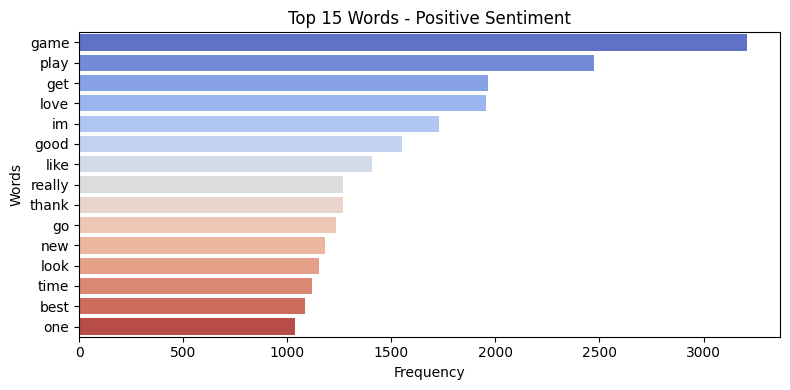

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


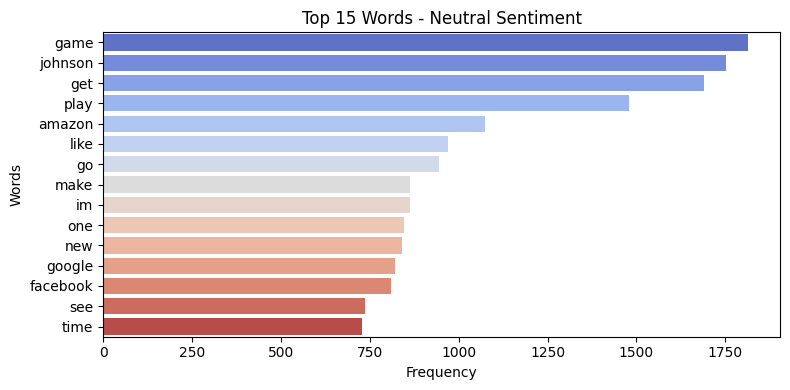

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


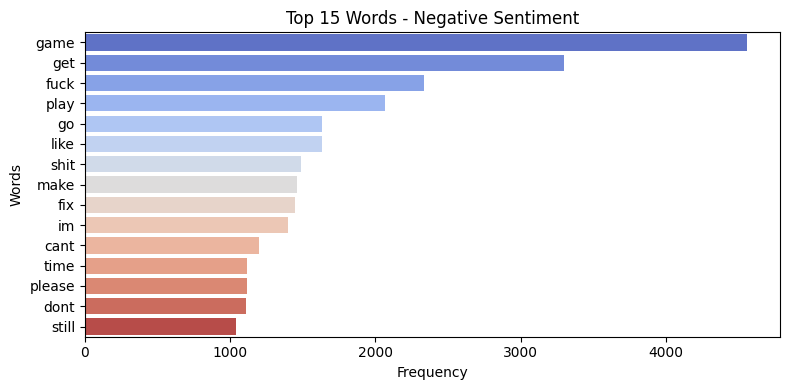

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


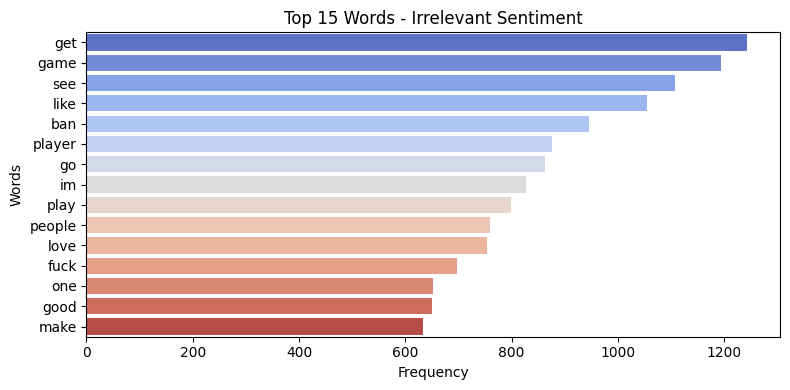

In [40]:
def plot_top_words_by_sentiment(df, label, top_n=15):
    words = ' '.join(df[df['sentiment'] == label]['content']).split()
    freq = Counter(words).most_common(top_n)
    word_list, count_list = zip(*freq)
    
    plt.figure(figsize=(8,4))
    sns.barplot(x=list(count_list), y=list(word_list), palette='coolwarm')
    plt.title(f"Top {top_n} Words - {label} Sentiment")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

# Call for each sentiment
for sentiment in df_clean_EDA['sentiment'].unique():
    plot_top_words_by_sentiment(df_clean_EDA, sentiment)

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text = ' '.join(df_clean_EDA['content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# plt.figure(figsize=(8, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud - All Sentiments')
# plt.show()

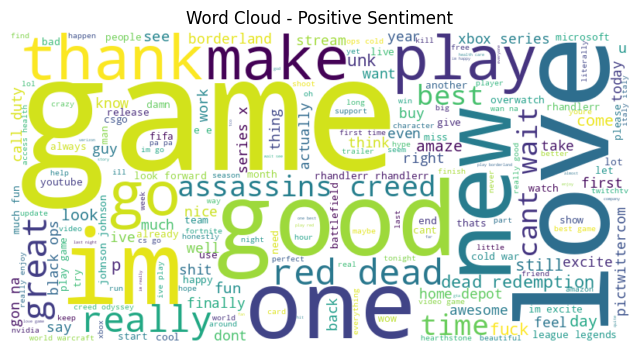

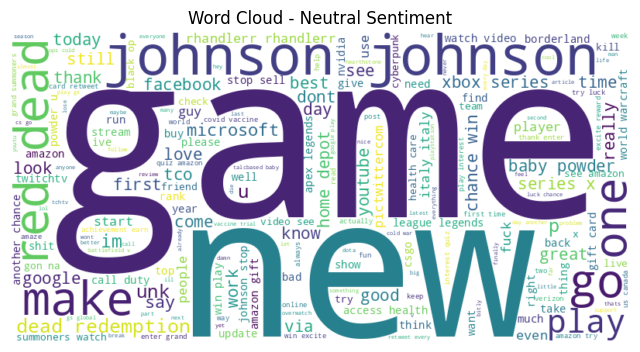

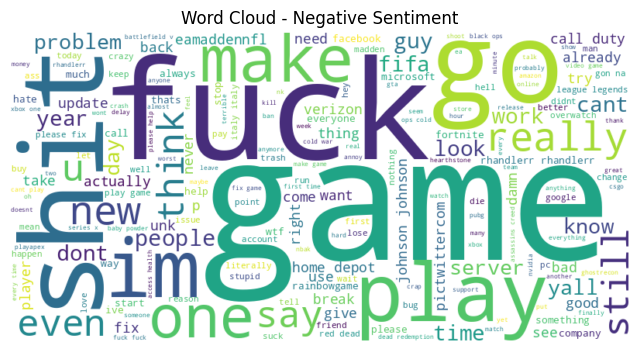

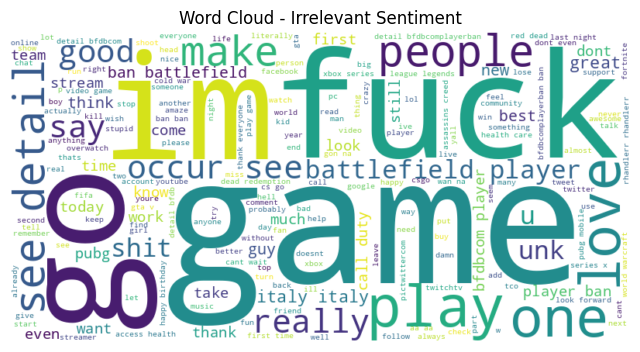

In [42]:
for sentiment in df_clean_EDA['sentiment'].unique():
    text = ' '.join(df_clean_EDA[df_clean_EDA['sentiment'] == sentiment]['content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment} Sentiment")
    plt.show()

In [43]:
# df_clean_EDA['word_count'] = df_clean_EDA['content'].apply(lambda x: len(x.split()))
# plt.figure(figsize=(10,6))
# sns.histplot(df_clean_EDA['word_count'], bins=20, kde=False, color='skyblue', edgecolor='black')
# plt.title('Distribution of Word Counts per Tweet')
# plt.xlabel('Number of Words')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

**Insights**
* Common words used across different sentiments are shown

# Model

In [44]:
df_train_v3 = df_clean.copy()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [46]:


X = df_train_v3['content']
y = df_train_v3['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [47]:

tfidf = TfidfVectorizer(
    max_features=5000,  # limit vocab size
    ngram_range=(1,2),  # unigrams and bigrams
    stop_words='english'  # common stopwords
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Baseline Models

### Logistic Regression

In [48]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_tfidf, y_train)

y_pred_lr = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  Irrelevant       0.66      0.50      0.57      2456
    Negative       0.68      0.77      0.72      4249
     Neutral       0.66      0.60      0.63      3450
    Positive       0.67      0.73      0.70      3844

    accuracy                           0.67     13999
   macro avg       0.67      0.65      0.65     13999
weighted avg       0.67      0.67      0.66     13999



### NB

In [49]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

  Irrelevant       0.69      0.35      0.47      2456
    Negative       0.61      0.79      0.69      4249
     Neutral       0.65      0.53      0.58      3450
    Positive       0.61      0.71      0.66      3844

    accuracy                           0.63     13999
   macro avg       0.64      0.60      0.60     13999
weighted avg       0.63      0.63      0.62     13999



### SVM

In [50]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

  Irrelevant       0.67      0.55      0.60      2456
    Negative       0.72      0.76      0.74      4249
     Neutral       0.68      0.62      0.65      3450
    Positive       0.67      0.74      0.71      3844

    accuracy                           0.69     13999
   macro avg       0.68      0.67      0.67     13999
weighted avg       0.69      0.69      0.68     13999



### XGBoost

In [51]:
# Encode
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_tfidf, y_train_enc)

y_pred_enc = xgb_model.predict(X_test_tfidf)

# Decode predictions back to original labels
y_pred = le.inverse_transform(y_pred_enc)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.73      0.34      0.46      2456
    Negative       0.57      0.82      0.67      4249
     Neutral       0.67      0.53      0.59      3450
    Positive       0.65      0.68      0.66      3844

    accuracy                           0.63     13999
   macro avg       0.65      0.59      0.60     13999
weighted avg       0.64      0.63      0.61     13999



### Random Forest

In [52]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

  Irrelevant       0.92      0.80      0.86      2456
    Negative       0.88      0.91      0.90      4249
     Neutral       0.88      0.85      0.87      3450
    Positive       0.84      0.90      0.87      3844

    accuracy                           0.87     13999
   macro avg       0.88      0.87      0.87     13999
weighted avg       0.88      0.87      0.87     13999



In [53]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import classification_report

# Fix: Convert sparse to dense and then to ndarray
X_train_lgb = np.asarray(X_train_tfidf.todense())
X_test_lgb = np.asarray(X_test_tfidf.todense())

# Train LightGBM
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train_lgb, y_train_enc)

# Predict
y_pred_lgb = lgb_clf.predict(X_test_lgb)

# Report
print(classification_report(y_test_enc, y_pred_lgb, target_names=le.classes_))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.063193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131976
[LightGBM] [Info] Number of data points in the train set: 55994, number of used features: 3922
[LightGBM] [Info] Start training from score -1.740518
[LightGBM] [Info] Start training from score -1.192267
[LightGBM] [Info] Start training from score -1.400648
[LightGBM] [Info] Start training from score -1.292437
              precision    recall  f1-score   support

  Irrelevant       0.67      0.39      0.50      2456
    Negative       0.61      0.78      0.68      4249
     Neutral       0.66      0.54      0.59      3450
    Positive       0.63      0.70      0.66      3844

    accuracy                           0.63     13999
   macro avg       0.64      0.60      0.61     13999
weighted avg       0.64      0.63      0.62     13999



**Among the base models;**
* Random forest performs the best with clear margin against others with 87% accuracy
* The precision and recall in the model looks good across sentiments
* Rest of the models performs across 60% to 70% acuuracy

## Hybrid

### Ensemble

In [54]:

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=2000, random_state=42)),
        ('svm', LinearSVC()),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    voting='hard'  # You can also try 'soft' if all support proba
)

voting_clf.fit(X_train_tfidf, y_train)
y_pred_vote = voting_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

  Irrelevant       0.70      0.59      0.64      2456
    Negative       0.73      0.79      0.76      4249
     Neutral       0.72      0.65      0.68      3450
    Positive       0.70      0.77      0.73      3844

    accuracy                           0.71     13999
   macro avg       0.71      0.70      0.70     13999
weighted avg       0.71      0.71      0.71     13999



In [55]:
# from sklearn.ensemble import StackingClassifier

# stack_clf = StackingClassifier(
#     estimators=[
#         ('lr', LogisticRegression(max_iter=2000)),
#         ('svm', LinearSVC()),
#         ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
#     ],
#     final_estimator=LogisticRegression()
# )

# stack_clf.fit(X_train_tfidf, y_train)
# y_pred_stack = stack_clf.predict(X_test_tfidf)
# print(classification_report(y_test, y_pred_stack))


*The hybrid model which combines the top 3 performed base model doesnt beat the performance of Random forest but provided decent metrics than others*

## Tuning

### Logistic Regression

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # l2 is standard for multi-class
    'solver': ['lbfgs'],  # Suitable for multi-class
    'max_iter': [1000]
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42),
                       param_grid_lr, cv=3, n_jobs=-1, scoring='accuracy')

grid_lr.fit(X_train_tfidf, y_train)

print("Best Parameters (LR):", grid_lr.best_params_)
y_pred_lr_tuned = grid_lr.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_lr_tuned))


Best Parameters (LR): {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

  Irrelevant       0.66      0.58      0.62      2456
    Negative       0.73      0.76      0.74      4249
     Neutral       0.68      0.64      0.66      3450
    Positive       0.68      0.75      0.71      3844

    accuracy                           0.69     13999
   macro avg       0.69      0.68      0.68     13999
weighted avg       0.69      0.69      0.69     13999



### SVM

In [65]:
from sklearn.svm import LinearSVC

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10]
}

grid_svm = GridSearchCV(LinearSVC(random_state=42),
                        param_grid_svm, cv=3, n_jobs=-1, scoring='accuracy')

grid_svm.fit(X_train_tfidf, y_train)

print("Best Parameters (SVM):", grid_svm.best_params_)
y_pred_svm_tuned = grid_svm.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_svm_tuned))


Best Parameters (SVM): {'C': 10}
              precision    recall  f1-score   support

  Irrelevant       0.66      0.58      0.62      2456
    Negative       0.72      0.76      0.74      4249
     Neutral       0.68      0.63      0.66      3450
    Positive       0.68      0.74      0.71      3844

    accuracy                           0.69     13999
   macro avg       0.69      0.68      0.68     13999
weighted avg       0.69      0.69      0.69     13999



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')

grid_rf.fit(X_train_tfidf, y_train)

print("Best Parameters (RF):", grid_rf.best_params_)
y_pred_rf_tuned = grid_rf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_rf_tuned))


* Tuned Random forest model performs the best among all experimented models.
* Proceeding with the above for validation.....

# Validation

In [68]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Pipeline

In [69]:
# Custom Text Preprocessor
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def basic_cleaning(self, text):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def remove_stopwords(self, text):
        return ' '.join([word for word in text.split() if word not in self.stop_words])

    def lemmatize(self, text):
        tokens = word_tokenize(text)
        return ' '.join([self.lemmatizer.lemmatize(word, pos='v') for word in tokens])

    def transform(self, X, y=None):
        return X.apply(lambda text: self.lemmatize(
            self.remove_stopwords(
                self.basic_cleaning(text)
            )
        ))

    def fit(self, X, y=None):
        return self


In [70]:
# Final Pipeline
pipeline_rf = Pipeline([
    ('cleaner', TextCleaner()),
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])


### Prediction

In [71]:
# === Train on train data ===
pipeline_rf.fit(df_train_v3['content'], df_train_v3['sentiment'])

Pipeline(steps=[('cleaner', TextCleaner()),
                ('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('rf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [72]:

# === Predict on external test data ===
val_preds = pipeline_rf.predict(df_val_v1['content'])

In [73]:
df_val_v1['predicted_sentiment'] = val_preds

print(df_val_v1[['content', 'predicted_sentiment']].head())

                                             content predicted_sentiment
0  I mentioned on Facebook that I was struggling ...          Irrelevant
1  BBC News - Amazon boss Jeff Bezos rejects clai...             Neutral
2  @Microsoft Why do I pay for WORD when it funct...            Negative
3  CSGO matchmaking is so full of closet hacking,...            Negative
4  Now the President is slapping Americans in the...             Neutral


In [74]:
from sklearn.metrics import accuracy_score, classification_report
val_true = df_val_v1['sentiment'] 

# Accuracy
val_accuracy = accuracy_score(val_true, val_preds)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Detailed report
print("Validation Classification Report:")
print(classification_report(val_true, val_preds))

Validation Accuracy: 0.9600
Validation Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.98      0.97      0.97       172
    Negative       0.96      0.97      0.96       266
     Neutral       0.97      0.94      0.96       285
    Positive       0.94      0.97      0.95       277

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



* The model fits very well on unseen validation data suggesting it doesnt overfit the train data.
* F1 score across all four sentiments suggests that the balance between precision and recall is promising

In [ ]:
# val_preds

In [82]:
# Create a confusion matrix
cm = confusion_matrix(val_true, val_preds, labels=pipeline_rf.classes_)

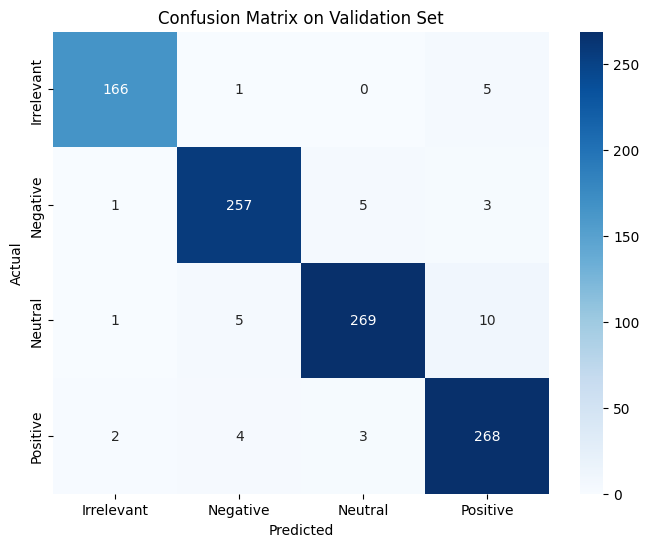

In [83]:
# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=pipeline_rf.classes_, yticklabels=pipeline_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Validation Set')
plt.show()

In [79]:
for sentiment_label in df_val_v1['sentiment'].unique():
    print(f"\n==== {sentiment_label.upper()} ====")
    subset = df_val_v1[df_val_v1['sentiment'] == sentiment_label].sample(5)
    for i, row in subset.iterrows():
        print(f"\nContent: {row['content']}")
        print(f"Actual: {row['sentiment']} | Predicted: {row['predicted_sentiment']}")


==== IRRELEVANT ====

Content: Communication is Key. We bust they ASS 😂
Actual: Irrelevant | Predicted: Irrelevant

Content: why can i hear my little sister arguing with people on PubG
Actual: Irrelevant | Predicted: Irrelevant

Content: It's our pleasure H
Actual: Irrelevant | Predicted: Irrelevant

Content: Whenever I feel a bit low, The Uncool Club's Facebook group always manages to cheer me up. What a wonderful group of humans 🥺

(If you wanna join, feel free! Everyone is welcome ❤️ facebook.com/groups/6127272…)
Actual: Irrelevant | Predicted: Irrelevant

Content: How many of you have bought the season 6 battle pass for Modern war zone? Personally it’s fucking sicko mode 🔥🔥🔥
•
•
•
•
•
#CallofDutyModernWarfare #CallOfDuty #Warzone #XboxSeriesX #PlayStation5 #season6 #battlepass #COVID19 #youtubers #fun #videogames #mw #xbox #viral pic.twitter.com/rZR47HAdWV
Actual: Irrelevant | Predicted: Irrelevant

==== NEUTRAL ====

Content: 18th of Aug, 2020 🥳
Happy birthday to these amazing pl

### Error Analysis

In [86]:
# Create a DataFrame to compare
error_df = df_val_v1.copy()
error_df['predicted'] = val_preds

# Filter only misclassified rows
misclassified = error_df[error_df['sentiment'] != error_df['predicted']]

In [88]:
print("Misclassified points : ", len(misclassified))

Misclassified points :  40


In [90]:
len(misclassified) / len(df_val_v1)*100

4.0

In [85]:
# Show few examples
print(misclassified[['content', 'sentiment', 'predicted']].sample(10, random_state=42))

                                               content   sentiment   predicted
512                                   This is chilling    Negative     Neutral
448  Hey #jackwagons why dont you get over here and...     Neutral    Negative
405  By combining product #engagement #analytics, #...    Positive     Neutral
693                        This man is so wholesome 😭💖    Positive    Negative
93                                            Wilson 💛  Irrelevant    Positive
329  @GhostRecon #GhostReconBreakpoint just took do...    Negative     Neutral
914  I’ve got #RedTeam winning round 2! Share who y...     Neutral  Irrelevant
697                                          Aiiight 💪     Neutral    Positive
956                          FUCKING FINALLLLYYYYYYYYY    Positive    Negative
111              Joe Buck is excited when  Hearthstone     Neutral    Positive
